In [24]:
import pandas as pd
import numpy as np
import tensorflow as tf
import re
import nltk
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import scipy
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from sklearn.linear_model import Logistic


In [2]:
from google.colab import files
uploaded = files.upload()

Saving Tweets.csv to Tweets (2).csv


In [3]:
df = pd.read_csv('Tweets.csv')
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,5.703060e+17,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,24/02/2015 11:35,NaN,Eastern Time (US & Canada)
1,5.703010e+17,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,24/02/2015 11:15,NaN,Pacific Time (US & Canada)
2,5.703010e+17,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,24/02/2015 11:15,Lets Play,Central Time (US & Canada)
3,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,24/02/2015 11:15,NaN,Pacific Time (US & Canada)
4,5.703010e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,24/02/2015 11:14,NaN,Pacific Time (US & Canada)


In [4]:
df = df[['text','airline_sentiment']]
df.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


# cleaning text data

In [5]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
stop = stopwords.words('english')

In [7]:
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [8]:
def text_cleaner(text):
    text = text.lower()
    text = re.sub("[^a-z]"," ",text)
    words = text.split()
    imp_words = [w for w in words if w not in stop]

    return " ".join(imp_words)

In [9]:
text_cleaner('The sun was setting over the city, casting a warm golden glow over the bustling streets. People were hurrying home from work, their steps quickening as they imagined the comfort of their homes and the promise of a hot meal. The air was filled with the sounds of honking cars and chatter, creating a symphony of city life. The tall buildings loomed over the streets, their windows reflecting the last rays of sunlight. It was a beautiful scene, one that reminded you of the hustle and bustle of city living and the never-ending energy that pulsed through its veins.')

'sun setting city casting warm golden glow bustling streets people hurrying home work steps quickening imagined comfort homes promise hot meal air filled sounds honking cars chatter creating symphony city life tall buildings loomed streets windows reflecting last rays sunlight beautiful scene one reminded hustle bustle city living never ending energy pulsed veins'

In [10]:
df['cleaned_text'] = df['text'].apply(lambda x : text_cleaner(x))

In [11]:
df.head()

,text,airline_sentiment,cleaned_text
0,@VirginAmerica What @dhepburn said.,neutral,virginamerica dhepburn said
1,@VirginAmerica plus you've added commercials t...,positive,virginamerica plus added commercials experienc...
2,@VirginAmerica I didn't today... Must mean I n...,neutral,virginamerica today must mean need take anothe...
3,@VirginAmerica it's really aggressive to blast...,negative,virginamerica really aggressive blast obnoxiou...
4,@VirginAmerica and it's a really big bad thing...,negative,virginamerica really big bad thing


In [12]:
df = df[['cleaned_text','airline_sentiment']]

In [13]:
encoder = LabelEncoder()
df['airline_sentiment'] = encoder.fit_transform(df['airline_sentiment'])
df.head()

<ipython-input-13-dbf472849130>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['airline_sentiment'] = encoder.fit_transform(df['airline_sentiment'])


,cleaned_text,airline_sentiment
0,virginamerica dhepburn said,1
1,virginamerica plus added commercials experienc...,2
2,virginamerica today must mean need take anothe...,1
3,virginamerica really aggressive blast obnoxiou...,0
4,virginamerica really big bad thing,0


In [14]:
x = df['cleaned_text']
y = df['airline_sentiment']

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=3,test_size=0.3)

In [16]:
# TFIDF

In [17]:
tfid = TfidfVectorizer()

In [18]:
x_train = tfid.fit_transform(x_train)
x_test = tfid.transform(x_test)

In [19]:
x_train = scipy.sparse.csr_matrix.todense(x_train)
x_test = scipy.sparse.csr_matrix.todense(x_test)

Model Building

In [20]:
model = Sequential([
                      Dense(5000,activation='tanh',input_shape = (x_train.shape[1],)),
                      Dense(1000,activation='sigmoid'),
                      Dense(2000,activation='sigmoid'),
                      Dense(3,activation='softmax')
                  ])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5000)              55140000  
                                                                 
 dense_1 (Dense)             (None, 1000)              5001000   
                                                                 
 dense_2 (Dense)             (None, 2000)              2002000   
                                                                 
 dense_3 (Dense)             (None, 3)                 6003      
                                                                 
Total params: 62,149,003
Trainable params: 62,149,003
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.compile(optimizer= 'Adam', loss='SparseCategoricalCrossentropy',metrics=['accuracy'])

In [22]:
history = model.fit(x_train,y_train,epochs=3,batch_size=500,validation_data=[x_test,y_test])

Epoch 1/3
21/21 [==============================] - 62s 3s/step - loss: 1.4226 - accuracy: 0.5563 - val_loss: 0.8153 - val_accuracy: 0.6765
Epoch 2/3
21/21 [==============================] - 60s 3s/step - loss: 0.6246 - accuracy: 0.7311 - val_loss: 0.5883 - val_accuracy: 0.7780
Epoch 3/3
21/21 [==============================] - 61s 3s/step - loss: 0.3228 - accuracy: 0.8837 - val_loss: 0.6209 - val_accuracy: 0.7846


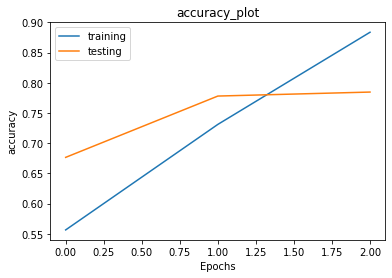

In [25]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.title('accuracy_plot')
plt.legend(['training','testing'])